# Final Project1: A Supervised Machine Learning Approach to Predict Vulnerability to Heart Disease

# Step 1:Collecting Data 

In [1]:
import pandas as pd  #import library
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,make_scorer,roc_curve,roc_auc_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')


In [2]:
url='https://raw.githubusercontent.com/hasinroses/ML-Assignment/main/HeartDisease.csv'

In [3]:
df=pd.read_csv(url)

In [4]:
#df=pd.read_csv('Heart Disease.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# Step2: Data Preperation

# A. Exploratory data analysis(EDA)

# 1. Understanding Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [9]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [10]:
df['AgeCategory'].nunique()

13

In [11]:
df['Race'].nunique()

6

In [12]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [13]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
df['GenHealth'].nunique()

5

# 2. Visualizing data

<Figure size 7200x3600 with 0 Axes>

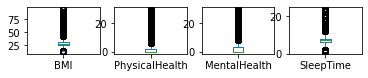

In [15]:
f=plt.figure()
f.set_figwidth(100)
f.set_figheight(50)
df.plot(kind='box',subplots=True,layout=(4,4), sharex=False, sharey=False)
plt.show()

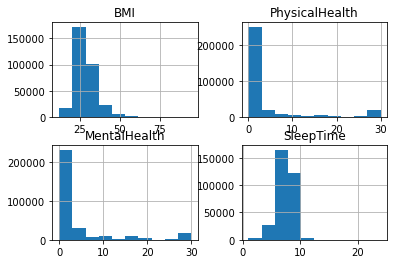

In [16]:
df.hist()
plt.show()

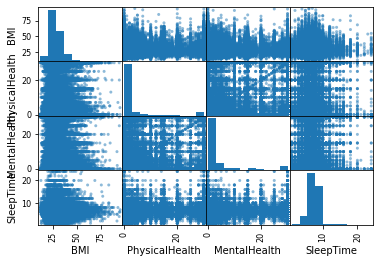

In [17]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df)
plt.show()

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

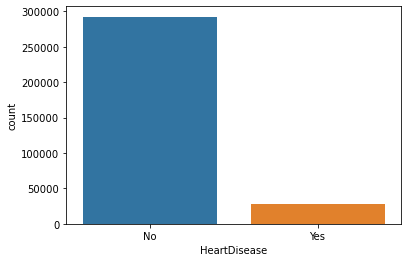

In [18]:
sns.countplot(df['HeartDisease'])

<AxesSubplot:xlabel='Smoking', ylabel='count'>

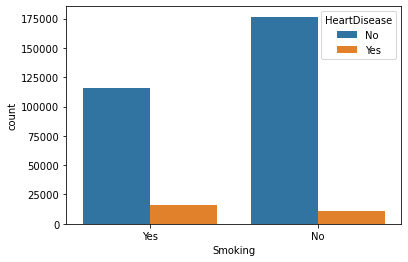

In [19]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df)

<Figure size 720x1080 with 0 Axes>

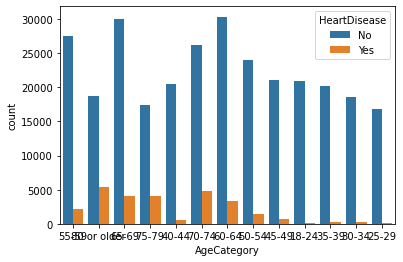

<Figure size 720x1080 with 0 Axes>

In [20]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)
plt.figure(figsize=(10,15))

<AxesSubplot:xlabel='BMI', ylabel='count'>

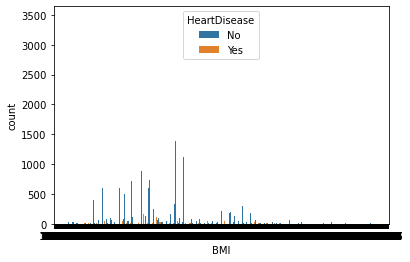

In [21]:
sns.countplot(x='BMI',hue='HeartDisease',data=df)

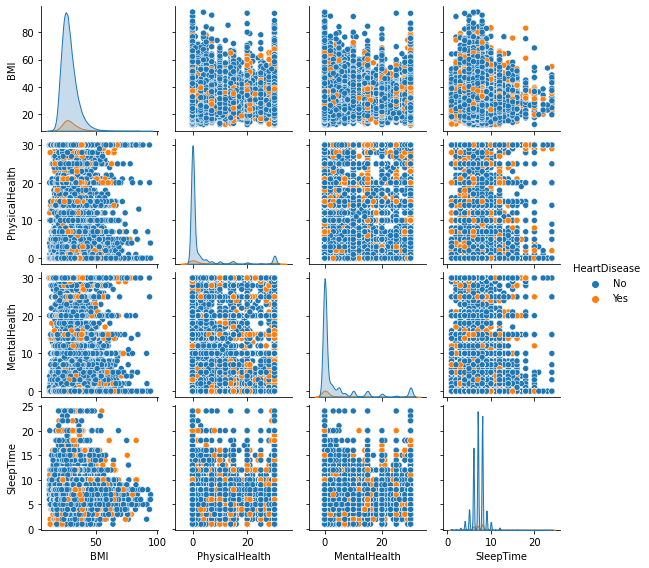

In [22]:
sns.pairplot(df, hue='HeartDisease', height=2)

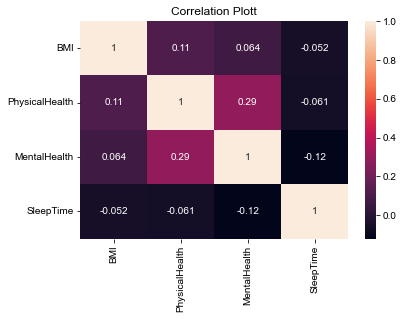

In [23]:
corr_set=sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Plott')
sns.set({'figure.figsize':(11,8)})
#plt.figure(figsize=(30,40),dpi=80)
plt.show()

# 3.Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [25]:
# Since The Dataset does not contain any NAN Value, Data Cleaning is not Required.

# 4. Handling Missing Value

In [26]:
#Dataset does not contain any missing Value

# 5.Removing Duplicate Rows

In [27]:
duplicate = df[df.duplicated()]  
print("Duplicate Rows :")

Duplicate Rows :


In [28]:
#Dataset does not contain Duplicate value

# 6.Handing Outlier

In [29]:
df.shape

(319795, 18)

In [30]:
numeric_col_list=[]                  # List of Numeric Column
for col in df.columns:
    if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
        numeric_col_list.append(col)

In [31]:
#Plotting all numeric Column with Outlier

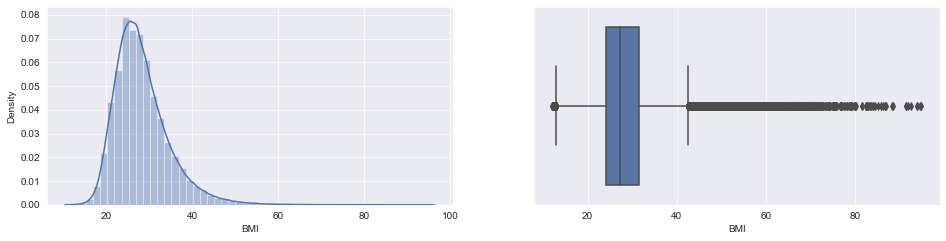

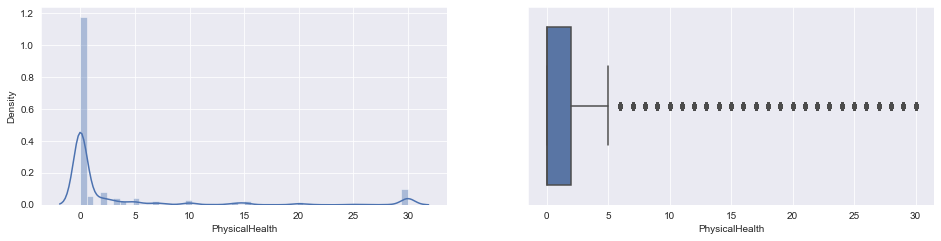

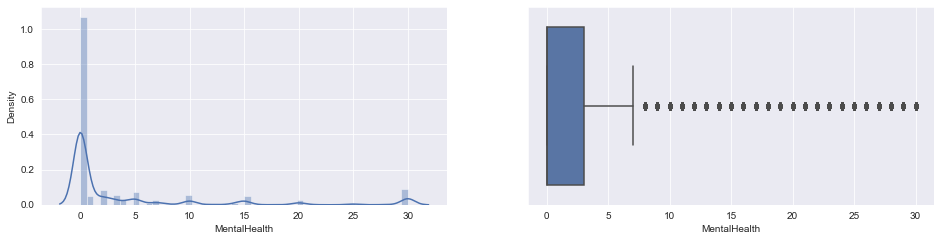

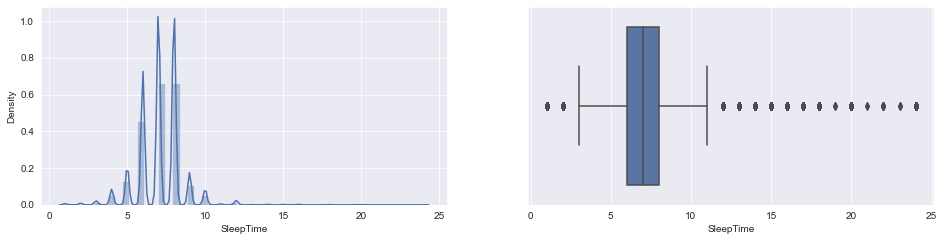

In [32]:
import numpy as np                 
for col in numeric_col_list:
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    plt.subplot(2,2,2)
    sns.boxplot(df[col])
    plt.show()

In [33]:
#Removing Outlier by Using Percentile Method

Compare the plots after Trimming


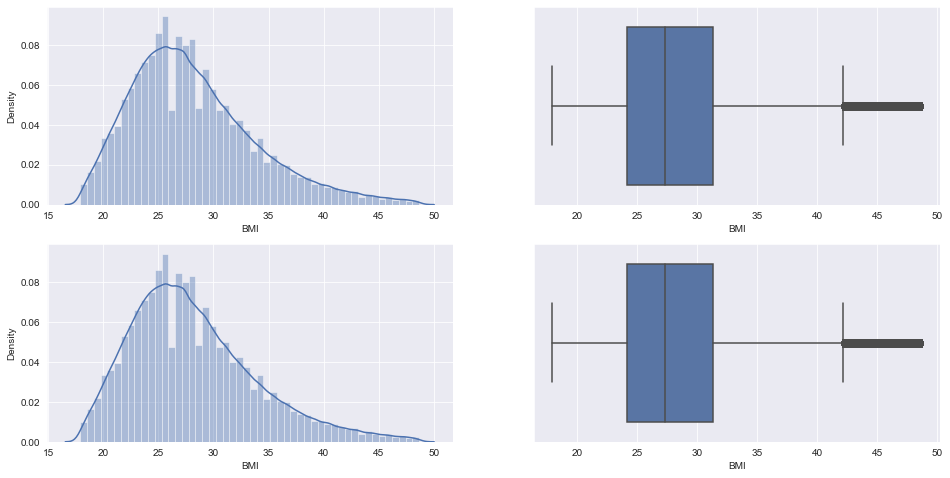

Compare the plots after Trimming


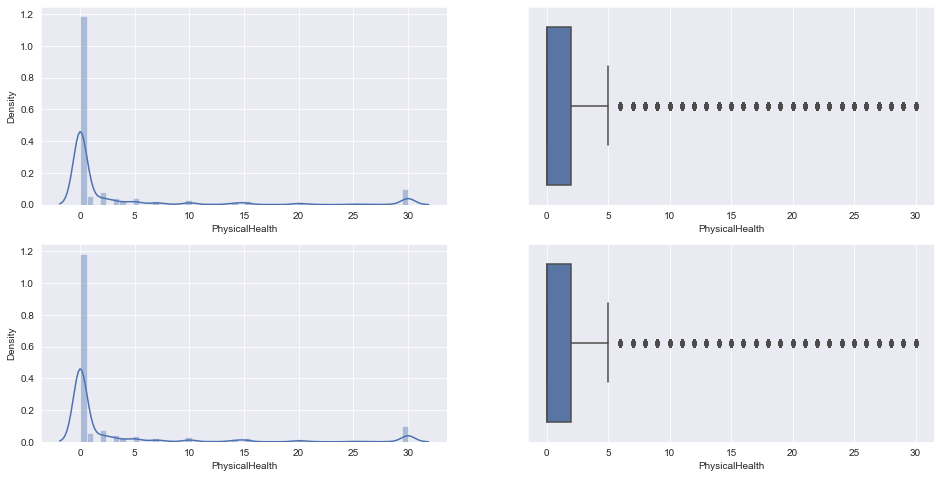

Compare the plots after Trimming


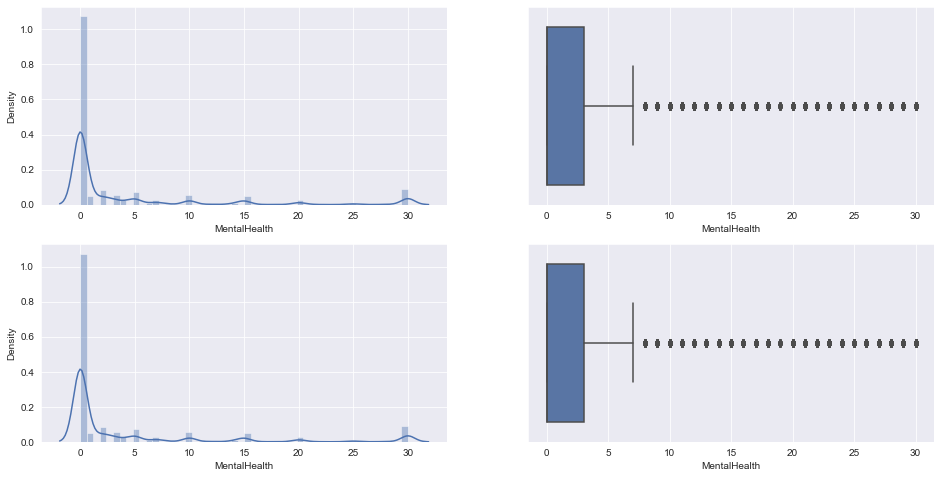

Compare the plots after Trimming


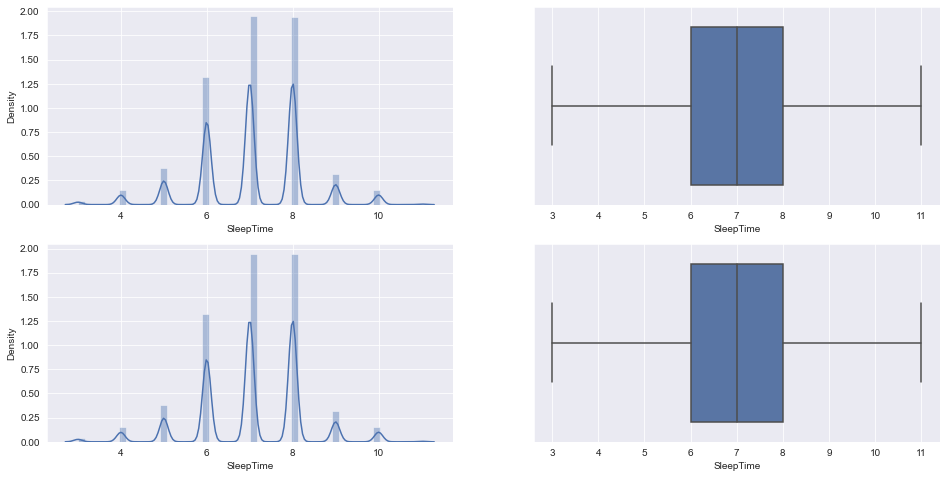

In [34]:
import numpy as np
for col in numeric_col_list:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    plt.subplot(2,2,2)
    sns.boxplot(df[col])
    print('Compare the plots after Trimming')
    plt.subplot(2,2,3)
    sns.distplot(df[col])
    plt.subplot(2,2,4)
    sns.boxplot(df[col])
    plt.show()

In [35]:
df.shape

(309066, 18)

In [36]:
#Apply Capping(Winsorization)

In [37]:
#for col in numeric_col_list:
    #df[col] = np.where(df[col] >= upper_limit,
      # upper_limit,
       #np.where(df[col] <= lower_limit,
       #lower_limit,
       #df[col]))

    #plt.figure(figsize=(16,8))
    #plt.subplot(2,2,1)
    #sns.distplot(df[col])
    #plt.subplot(2,2,2)
    #sns.boxplot(df[col])
    #print('Compare the plots after Capping')
    #plt.subplot(2,2,3)
    #sns.distplot(df[col])
    #plt.subplot(2,2,4)
    #sns.boxplot(df[col])
    #plt.show()

In [38]:
df.shape

(309066, 18)

# B. Feature Engineering

# 1. Encoding Categorical Data

In [39]:
cols=df.columns

In [40]:
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()

In [41]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes


In [42]:
df['Diabetic'].unique()

array(['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [43]:
cols=df.columns
col_binary_value=[]
for col in cols:
    if df[col].nunique()==2:
        col_binary_value.append(col)

In [44]:
for col in col_binary_value:
    df[col]=le.fit_transform(df[col])

In [45]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,No,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,Yes,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,White,No,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,White,No,1,Very good,8,0,0,0
6,0,21.63,0,0,0,15,0,0,0,70-74,White,No,1,Fair,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,80 or older,White,Yes,0,Good,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,80 or older,White,"No, borderline diabetes",0,Fair,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,65-69,White,No,1,Good,10,0,0,0
11,0,28.71,1,0,0,0,0,0,0,55-59,White,No,1,Very good,5,0,0,0
12,0,28.37,1,0,0,0,0,1,1,75-79,White,Yes,1,Very good,8,0,0,0


In [46]:
oren=OrdinalEncoder()

In [47]:
df['AgeCategory']=oren.fit_transform(df[['AgeCategory']])

In [48]:
for col in df.columns:
    if is_string_dtype(df[col]):
        df[col]=oren.fit_transform(df[[col]])

In [49]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0,0,0,0,12.0,5.0,0.0,1,4.0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9.0,5.0,2.0,1,1.0,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11.0,5.0,0.0,0,2.0,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4.0,5.0,0.0,1,4.0,8,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10.0,5.0,0.0,1,1.0,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12.0,5.0,2.0,0,2.0,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12.0,5.0,1.0,0,1.0,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9.0,5.0,0.0,1,2.0,10,0,0,0
11,0,28.71,1,0,0,0,0,0,0,7.0,5.0,0.0,1,4.0,5,0,0,0
12,0,28.37,1,0,0,0,0,1,1,11.0,5.0,2.0,1,4.0,8,0,0,0


In [50]:
df['HeartDisease'].value_counts()

0    283048
1     26018
Name: HeartDisease, dtype: int64

# 2. Seperate X and Y

In [51]:
X=df.drop('HeartDisease',axis=1)

In [52]:
Y=df[['HeartDisease']]

In [53]:
Y

,HeartDisease
1,0
2,0
3,0
4,0
6,0
...,...
319789,0
319790,1
319791,0
319792,0


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

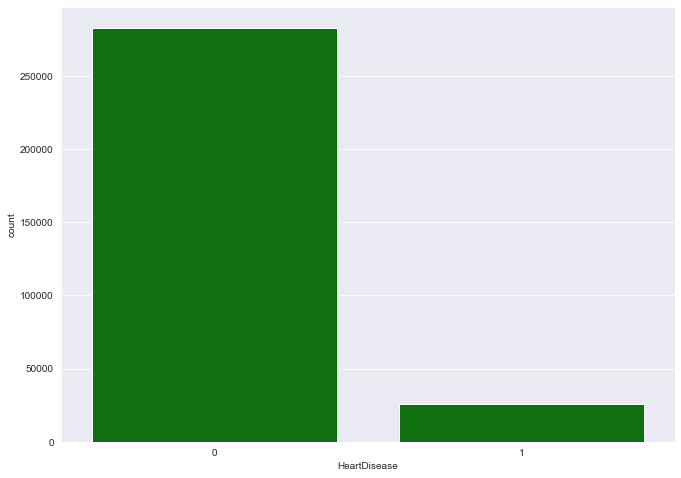

In [54]:
sns.countplot(df['HeartDisease'], color='green')

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

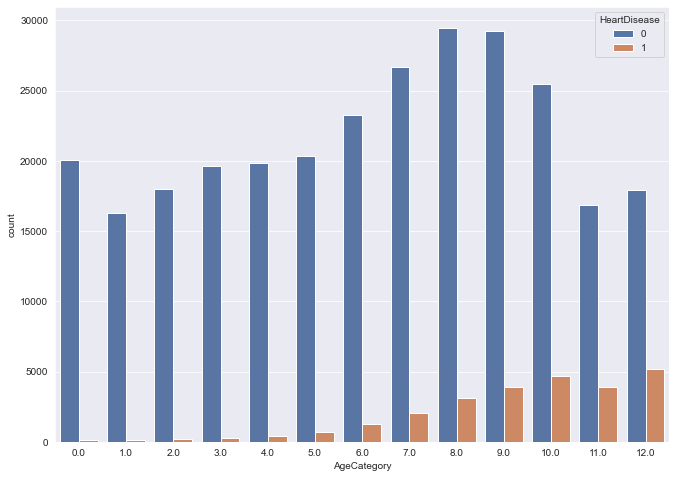

In [55]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)

# 3.Handling all imbalance data

In [56]:
from imblearn.combine import SMOTETomek # Importing Combination of Oversampling and Undersampling Technique SMOTE with Tomek

In [57]:
smtm=SMOTETomek()

In [58]:
Xsmt,Ysmt=smtm.fit_resample(X,Y)

In [59]:
Xsmt.shape

(561652, 17)

In [60]:
Ysmt.shape

(561652, 1)

# 4. Spliting Training  and Test Data

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(Xsmt,Ysmt,test_size=0.20,random_state=42)

In [62]:
Y_train.value_counts()

HeartDisease
0               224675
1               224646
dtype: int64

In [63]:
X_train.shape

(449321, 17)

In [64]:
Y_train.shape

(449321, 1)

In [65]:
X_test.shape

(112331, 17)

In [66]:
Y_test.shape

(112331, 1)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

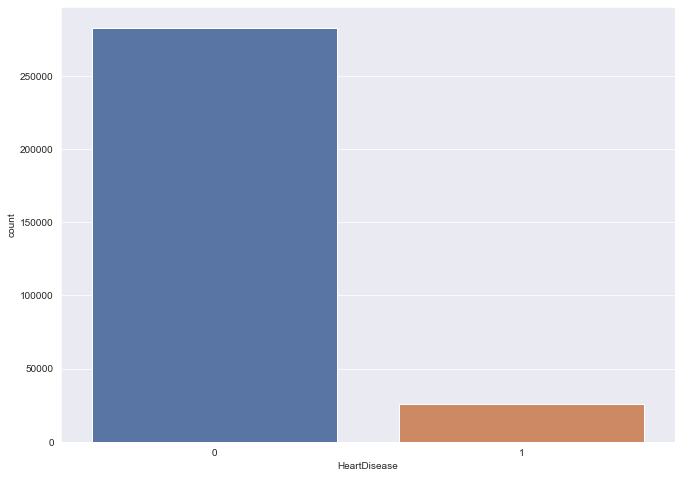

In [67]:
sns.countplot(df['HeartDisease'])

# 5. Feature Selection

In [68]:
#The given Dataset contain both Numeric and categorical Input and Categorical output. So ANOVA correlation coefficient (linear) 

In [69]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [70]:
fs = SelectKBest(score_func=f_classif, k='all')

In [71]:
fs.fit(X_train, Y_train)

SelectKBest(k='all')

In [72]:
X_train_fs = fs.transform(X_train)

In [73]:
print(X_train_fs)

[[27.46698026  0.          0.         ...  0.          0.
   0.        ]
 [27.98        0.          0.         ...  0.          0.
   0.        ]
 [30.11        0.          0.         ...  0.          0.
   0.        ]
 ...
 [29.43065224  1.          0.         ...  0.          0.
   0.        ]
 [21.7         0.          0.         ...  0.          0.
   0.        ]
 [37.42        1.          1.         ...  0.          0.
   0.        ]]


In [74]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4241.878280
Feature 1: 2735.126734
Feature 2: 12056.552973
Feature 3: 2726.450611
Feature 4: 26252.686749
Feature 5: 552.589615
Feature 6: 12653.923714
Feature 7: 252.526095
Feature 8: 115318.656219
Feature 9: 3626.982518
Feature 10: 30024.827596
Feature 11: 32104.496977
Feature 12: 232.537438
Feature 13: 3047.762954
Feature 14: 4967.440277
Feature 15: 604.562166
Feature 16: 224.779637


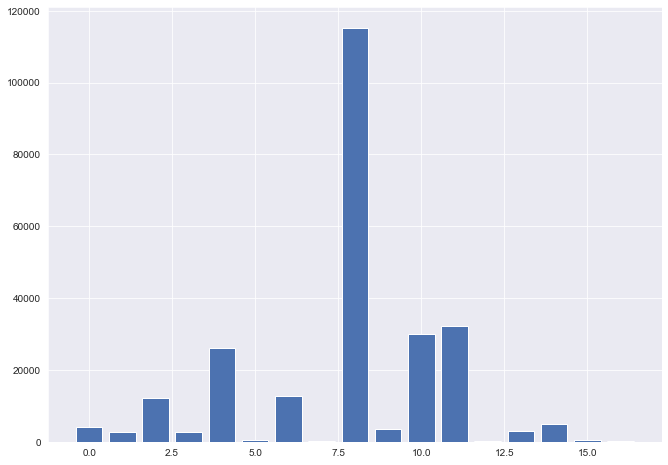

In [75]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [76]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4241.878280
Feature 1: 2735.126734
Feature 2: 12056.552973
Feature 3: 2726.450611
Feature 4: 26252.686749
Feature 5: 552.589615
Feature 6: 12653.923714
Feature 7: 252.526095
Feature 8: 115318.656219
Feature 9: 3626.982518
Feature 10: 30024.827596
Feature 11: 32104.496977
Feature 12: 232.537438
Feature 13: 3047.762954
Feature 14: 4967.440277
Feature 15: 604.562166
Feature 16: 224.779637


In [77]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
381235,27.466980,0,0,0,0,0,0,1,6.294967,2.0,0.000000,1,0.0,7,0,0,0
16823,27.980000,0,0,0,6,0,0,1,4.000000,5.0,0.000000,1,4.0,7,0,0,0
179459,30.110000,0,0,0,0,0,0,0,8.000000,5.0,0.000000,1,0.0,8,0,0,0
439481,20.620157,0,0,0,0,0,0,0,7.731771,5.0,1.268229,1,2.0,6,0,0,0
144551,29.180000,0,0,0,7,5,0,0,2.000000,2.0,0.000000,1,4.0,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,20.340000,1,0,0,0,0,0,1,11.000000,5.0,0.000000,0,0.0,7,0,0,0
259178,20.340000,0,0,0,0,0,0,1,0.000000,5.0,0.000000,1,0.0,8,0,0,0
365838,29.430652,1,0,0,30,0,0,0,8.000000,5.0,2.000000,0,3.0,8,0,0,0
131932,21.700000,0,0,0,0,0,0,1,8.000000,5.0,0.000000,1,0.0,7,0,0,0


# Step3: Model Selection

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [79]:
#Since Dataset is imbalance and large SVM Doesnot work well

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
models=[]
models.append(('dt',DecisionTreeClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('lr',LogisticRegression()))
models.append(('rf',RandomForestClassifier()))
models.append(('ada',AdaBoostClassifier()))
models.append(('xg',XGBClassifier(eval_metric='mlogloss')))

results=[]
names=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

dt: 0.896161 (0.001196)
knn: 0.856503 (0.001127)
lr: 0.749044 (0.001673)
rf: 0.923634 (0.001241)
ada: 0.800550 (0.002009)
xg: 0.885425 (0.001568)


In [81]:
# Compare Algorithms

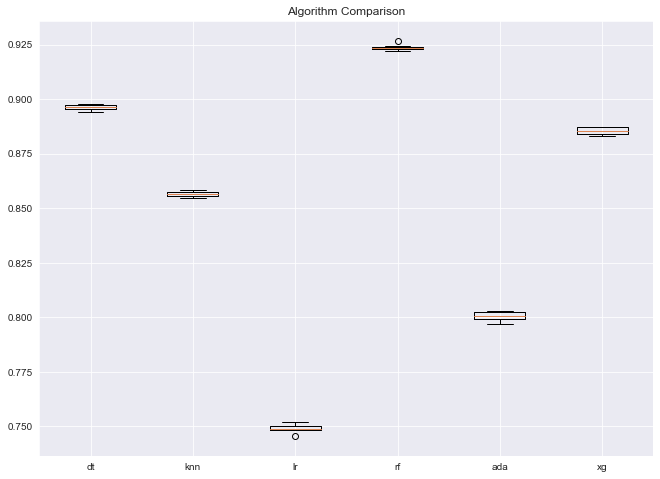

In [82]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# The results suggest that the Random Forest was perhaps the most accurate model. We will use this model as our final model.

# Step 4:Training the Model:

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfclf=RandomForestClassifier()

In [85]:
rfclf.fit(X_train,Y_train)

RandomForestClassifier()

In [86]:
rfclf.score(X_train,Y_train)  #Training Accuracy

0.9977655173027746

# Step 5. Evaluating the Model:
After training your model, we have to check to see how it’s performing. This is done by testing the performance of the model on previously unseen data.

In [87]:
# predict probabilities on Test and take probability for class 1([:1])

In [88]:
y_pred_prob_test = rfclf.predict_proba(X_test)[:, 1]

In [89]:
y_pred_prob_test

array([0.98, 1.  , 0.  , ..., 0.01, 1.  , 0.98])

In [90]:
rfclf.score(X_test,Y_test)    #Testing Score of the Model

0.9271349849996884

In [91]:
#Since the Dataset is imbalance, Precision Score and Recall Score very important 

In [92]:
Y_pred_test=rfclf.predict(X_test) 

In [93]:
# create onfusion matrix

In [94]:
cm = confusion_matrix(Y_test, Y_pred_test)
print("confusion Matrix is :")
print(cm)


confusion Matrix is :
[[51970  4181]
 [ 4004 52176]]


In [95]:
print("ROC-AUC score test dataset:", roc_auc_score(Y_test,Y_pred_test))

ROC-AUC score test dataset: 0.9271345733516106


In [96]:
print("precision score test dataset:", precision_score(Y_test,Y_pred_test))

precision score test dataset: 0.925812232730628


In [97]:
print("Recall score test dataset:", recall_score(Y_test,Y_pred_test))

Recall score test dataset: 0.9287290850836597


In [98]:
print("f1 score  test dataset:", f1_score(Y_test,Y_pred_test))

f1 score  test dataset: 0.9272683650710434


In [99]:
print(classification_report(Y_test,Y_pred_test)) #Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     56151
           1       0.93      0.93      0.93     56180

    accuracy                           0.93    112331
   macro avg       0.93      0.93      0.93    112331
weighted avg       0.93      0.93      0.93    112331



# ROC AUC Score

In [100]:
roc_auc_score(Y_test,Y_pred_test)

0.9271345733516106

# ROC Curve

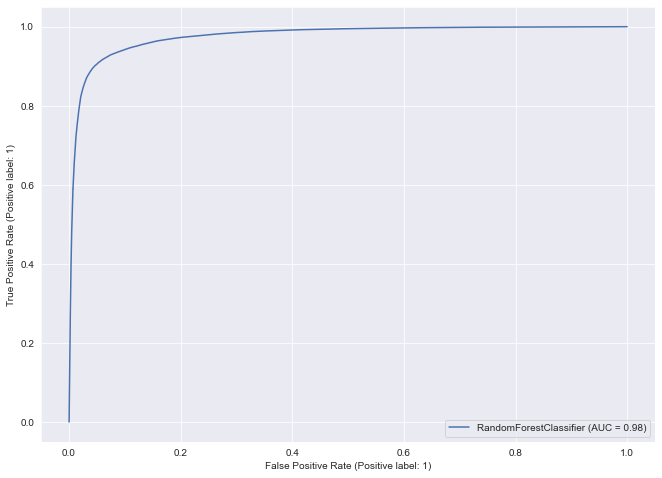

In [101]:
plot_roc_curve(rfclf,X_test,Y_test)

# Step 6: Hyper Parameter Tuning

In [102]:
#Since the Model Accuracy is 93%. Hyper Parameter Tuning is not Required.

# Step 7. Making Predictions
Finally model is ready for unseen data to make predictions accurately.